# RFM Segmentation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
retail_df = pd.read_csv("https://raw.githubusercontent.com/manaranjanp/ISB_MLUL/main/clustering/retail_txns.csv")

In [3]:
retail_df.Country.value_counts()

,count
Country,
France,8326


In [4]:
retail_df.Country.value_counts()

,count
Country,
France,8326


In [5]:
retail_df.shape

(8326, 9)

In [6]:
retail_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8326 entries, 0 to 8325
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        8326 non-null   int64  
 1   InvoiceNo    8326 non-null   int64  
 2   StockCode    8326 non-null   object 
 3   Description  8326 non-null   object 
 4   Quantity     8326 non-null   int64  
 5   InvoiceDate  8326 non-null   object 
 6   UnitPrice    8326 non-null   float64
 7   CustomerID   8326 non-null   float64
 8   Country      8326 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 585.5+ KB


In [7]:
retail_df.isnull().sum()

,0
index,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [8]:
retail_df.dropna( subset = ['CustomerID'], inplace = True)

In [9]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8326 entries, 0 to 8325
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        8326 non-null   int64  
 1   InvoiceNo    8326 non-null   int64  
 2   StockCode    8326 non-null   object 
 3   Description  8326 non-null   object 
 4   Quantity     8326 non-null   int64  
 5   InvoiceDate  8326 non-null   object 
 6   UnitPrice    8326 non-null   float64
 7   CustomerID   8326 non-null   float64
 8   Country      8326 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 585.5+ KB


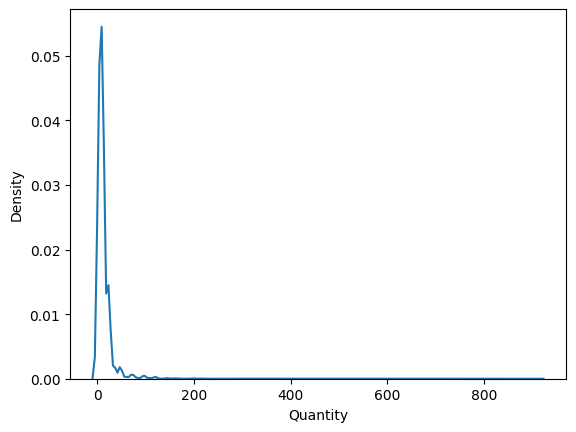

In [10]:
sn.kdeplot(retail_df.Quantity);

In [11]:
retail_df[retail_df.Quantity < 0][0:10]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


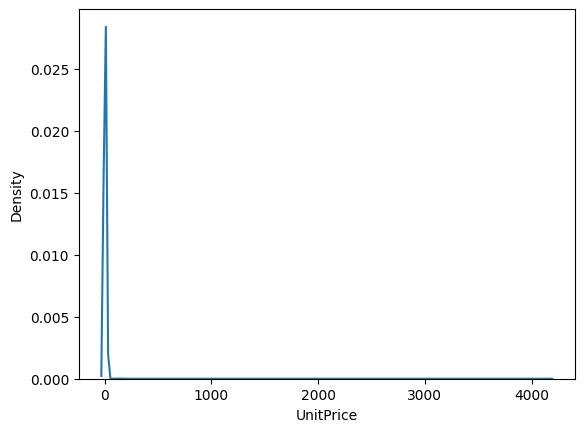

In [12]:
sn.kdeplot(retail_df.UnitPrice);

## Calculating the order value

In [13]:
retail_df['amount'] = retail_df.UnitPrice * retail_df.Quantity

In [14]:
retail_df[0:5]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,01/12/10 8:45,3.75,12583.0,France,90.0
1,1,536370,22727,ALARM CLOCK BAKELIKE RED,24,01/12/10 8:45,3.75,12583.0,France,90.0
2,2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,01/12/10 8:45,3.75,12583.0,France,45.0
3,3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,01/12/10 8:45,0.85,12583.0,France,10.2
4,4,536370,21883,STARS GIFT TAPE,24,01/12/10 8:45,0.65,12583.0,France,15.6


### RFM

In [15]:
invoices_df = retail_df.groupby(['InvoiceNo', 'InvoiceDate', 'CustomerID'])['amount'].sum().reset_index()

In [16]:
invoices_df.head(10)

,InvoiceNo,InvoiceDate,CustomerID,amount
0,536370,01/12/10 8:45,12583.0,855.86
1,536852,03/12/10 9:51,12686.0,89.14
2,536974,03/12/10 13:59,12682.0,336.24
3,537065,05/12/10 11:57,12567.0,1526.92
4,537463,07/12/10 10:08,12681.0,1033.52
5,537468,07/12/10 10:36,12567.0,415.46
6,537693,08/12/10 10:45,12441.0,173.55
7,537897,09/12/10 10:37,12683.0,213.88
8,537967,09/12/10 11:31,12494.0,57.60
9,538008,09/12/10 12:17,12683.0,849.20


In [17]:
invoices_df.shape

(390, 4)

In [18]:
invoices_df['InvoiceDate'] = pd.to_datetime(invoices_df['InvoiceDate'])

In [19]:
invoices_df.sample(10)

,InvoiceNo,InvoiceDate,CustomerID,amount
378,580534,2011-04-12 16:02:00,12724.0,208.24
188,559607,2011-11-07 11:39:00,12681.0,532.48
298,572925,2011-10-27 09:18:00,12523.0,228.22
137,553843,2011-05-19 12:29:00,12553.0,352.85
233,565443,2011-04-09 14:22:00,12567.0,891.82
118,552315,2011-08-05 16:10:00,12700.0,1092.43
353,577856,2011-11-22 11:19:00,12490.0,357.88
355,578277,2011-11-23 13:51:00,12723.0,329.12
90,547520,2011-03-23 14:55:00,12564.0,456.90
61,544355,2011-02-18 10:53:00,12714.0,968.30


### Which month the invoice is created

In [20]:
from dateutil.relativedelta import relativedelta

In [21]:
def getDiffInMonths(now, since):

    difference = relativedelta(now, since)
    return difference.months + difference.years * 12

In [65]:
min(invoices_df.InvoiceDate)

Timestamp('2010-01-12 08:45:00')

In [22]:
max(invoices_df.InvoiceDate)

Timestamp('2011-12-10 14:46:00')

In [23]:
last_month = max(invoices_df.InvoiceDate).date().replace(day=1)

In [24]:
last_month

datetime.date(2011, 12, 1)

In [25]:
invoices_df['monthsBefore'] =  invoices_df.apply(lambda rec:
                                    getDiffInMonths(last_month,
                                                    rec['InvoiceDate']),
                                                 axis = 1)

In [26]:
invoices_df

,InvoiceNo,InvoiceDate,CustomerID,amount,monthsBefore
0,536370,2010-01-12 08:45:00,12583.0,855.86,22
1,536852,2010-03-12 09:51:00,12686.0,89.14,20
2,536974,2010-03-12 13:59:00,12682.0,336.24,20
3,537065,2010-05-12 11:57:00,12567.0,1526.92,18
4,537463,2010-07-12 10:08:00,12681.0,1033.52,16
...,...,...,...,...,...
385,580986,2011-06-12 16:34:00,12650.0,314.44,5
386,581001,2011-07-12 08:07:00,12583.0,694.77,4
387,581171,2011-07-12 15:02:00,12615.0,422.85,4
388,581279,2011-08-12 11:35:00,12437.0,165.90,3


In [27]:
cust_grouping  = invoices_df.groupby(['CustomerID'])['monthsBefore']
invoices_df['recency'] = cust_grouping.transform('min')

In [28]:
invoices_df.sample(10)

,InvoiceNo,InvoiceDate,CustomerID,amount,monthsBefore,recency
232,565322,2011-02-09 13:15:00,12437.0,65.10,9,0
187,559441,2011-08-07 12:22:00,12583.0,329.24,3,0
381,580706,2011-05-12 16:31:00,12683.0,85.00,6,0
159,556259,2011-09-06 17:53:00,12721.0,591.09,2,2
104,550313,2011-04-17 11:21:00,12681.0,545.57,7,0
83,547087,2011-03-20 15:58:00,12726.0,316.02,8,0
85,547196,2011-03-21 12:44:00,12637.0,4.63,8,2
316,574252,2011-03-11 13:24:00,12437.0,260.48,8,0
47,542433,2011-01-28 10:45:00,12726.0,401.58,10,0
301,573036,2011-10-27 13:44:00,12437.0,263.46,1,0


In [29]:
invoices_df.shape

(390, 6)

In [30]:
recency_df = invoices_df[['CustomerID', 'recency']].drop_duplicates()

In [31]:
recency_df.shape

(87, 2)

## Calculating Frequency and Monetary Value


In [32]:
frequency_df = invoices_df.CustomerID.value_counts().reset_index()

In [33]:
frequency_df.columns = ['CustomerID', 'frequency']
frequency_df

,CustomerID,frequency
0,12682.0,31
1,12681.0,22
2,12437.0,18
3,12583.0,15
4,12683.0,15
...,...,...
82,12686.0,1
83,12573.0,1
84,12690.0,1
85,12732.0,1


In [34]:
mvalue_df = invoices_df.groupby(['CustomerID'])['amount'].sum().reset_index()
mvalue_df.columns = ['CustomerID', 'mvalue']
mvalue_df

,CustomerID,mvalue
0,12413.0,758.10
1,12437.0,4951.41
2,12441.0,173.55
3,12488.0,1298.66
4,12489.0,334.93
...,...,...
82,12734.0,110.40
83,12735.0,779.57
84,12736.0,234.00
85,12740.0,427.60


In [35]:
rfm_df = recency_df.merge(frequency_df, on = 'CustomerID').merge(mvalue_df, on = 'CustomerID')

In [36]:
rfm_df

,CustomerID,recency,frequency,mvalue
0,12583.0,0,15,7281.38
1,12686.0,20,1,89.14
2,12682.0,0,31,12279.82
3,12567.0,0,10,9401.28
4,12681.0,0,22,13787.54
...,...,...,...,...
82,12659.0,1,1,91.68
83,12617.0,1,1,352.98
84,12508.0,0,2,397.88
85,12660.0,0,1,245.10


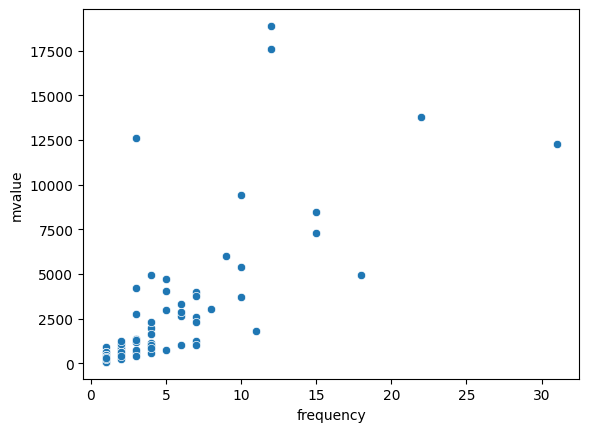

In [37]:
sn.scatterplot(data = rfm_df,
               x = 'frequency',
               y = 'mvalue');

In [38]:
rfm_df['frequency'].describe()

,frequency
count,87.000000
mean,4.482759
std,5.039062
min,1.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,31.000000


In [39]:
rfm_df['recency'].describe()

,recency
count,87.000000
mean,2.551724
std,3.790314
min,0.000000
25%,0.000000
50%,1.000000
75%,4.000000
max,20.000000


In [40]:
rfm_df['f_bin'] = pd.cut( rfm_df['frequency'], [0, 3, 6, 50], labels = ['Low', 'Medium', 'High'])
rfm_df['r_bin'] = pd.cut( rfm_df['recency'], [-1, 1, 4, 20], labels =['High', 'Medium', 'Low'])

In [41]:
rfm_df

,CustomerID,recency,frequency,mvalue,f_bin,r_bin
0,12583.0,0,15,7281.38,High,High
1,12686.0,20,1,89.14,Low,Low
2,12682.0,0,31,12279.82,High,High
3,12567.0,0,10,9401.28,High,High
4,12681.0,0,22,13787.54,High,High
...,...,...,...,...,...,...
82,12659.0,1,1,91.68,Low,High
83,12617.0,1,1,352.98,Low,High
84,12508.0,0,2,397.88,Low,High
85,12660.0,0,1,245.10,Low,High


In [42]:
rfm_segments = pd.crosstab(rfm_df.f_bin,
                           rfm_df.r_bin,
                           normalize = "all")

In [43]:
rfm_segments = rfm_segments.reindex(['High', 'Medium', 'Low'])

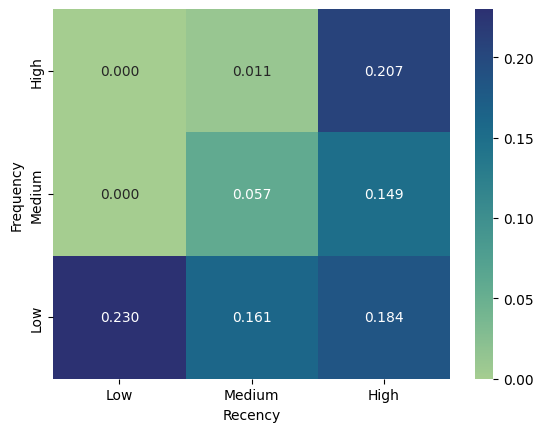

In [44]:
sn.heatmap(rfm_segments[['Low', 'Medium', 'High']],
           annot = True,
           fmt = "0.3f",
           cmap = "crest");
plt.xlabel("Recency")
plt.ylabel("Frequency");

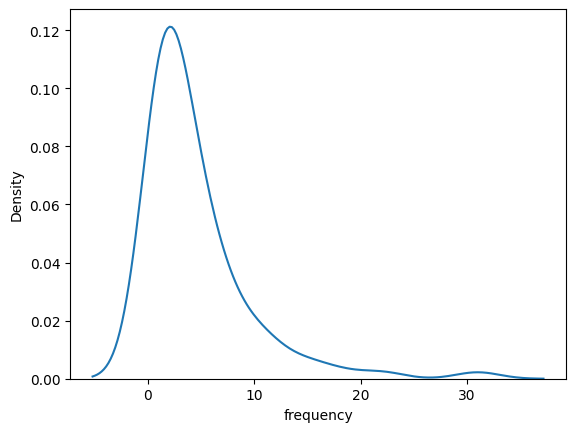

In [45]:
sn.kdeplot(rfm_df.frequency);

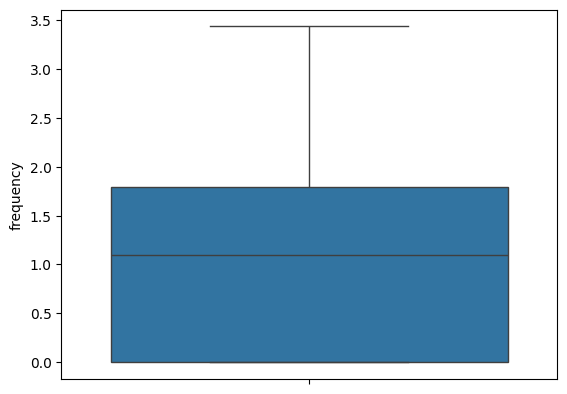

In [46]:
sn.boxplot(np.log(rfm_df.frequency));

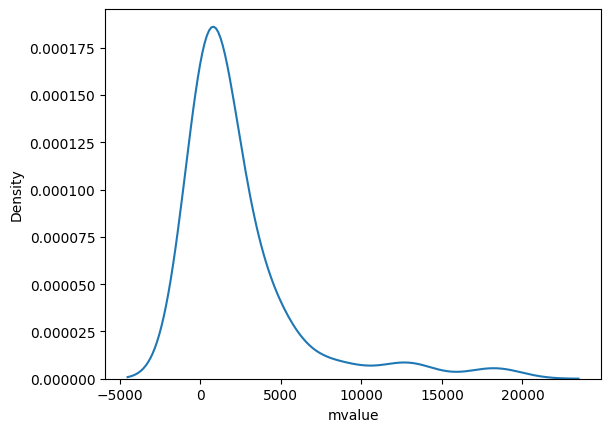

In [47]:
sn.kdeplot(rfm_df.mvalue);

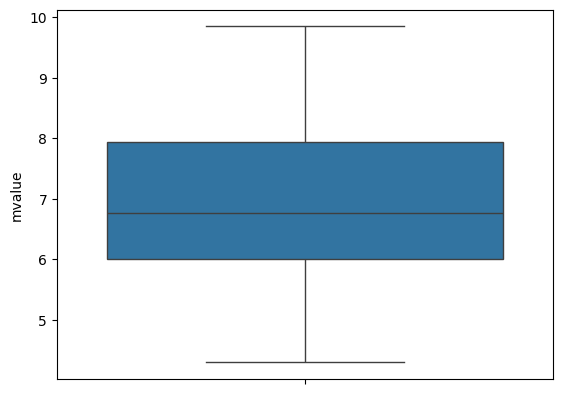

In [48]:
sn.boxplot(np.log(rfm_df.mvalue));

In [49]:
rfm_df['log_frequency'] = np.log(rfm_df.frequency)

In [50]:
rfm_df['log_mvalue'] = np.log(rfm_df.mvalue)

In [51]:
rfm_df.frequency.describe()

,frequency
count,87.000000
mean,4.482759
std,5.039062
min,1.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,31.000000


In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_rfm_df = scaler.fit_transform( rfm_df[['recency',
                                              'log_frequency',
                                              'log_mvalue']] )

In [53]:
scaled_rfm_df[0:10]

array([[0.        , 0.7886023 , 0.82815756],
       [1.        , 0.        , 0.03476452],
       [0.        , 1.        , 0.92233628],
       [0.        , 0.67052815, 0.87420303],
       [0.        , 0.9001322 , 0.94320479],
       [0.75      , 0.        , 0.15482358],
       [0.        , 0.7886023 , 0.85554521],
       [0.        , 0.56666203, 0.51005166],
       [0.        , 0.72362141, 1.        ],
       [0.35      , 0.31992323, 0.38617094]])

In [54]:
from sklearn.cluster import KMeans

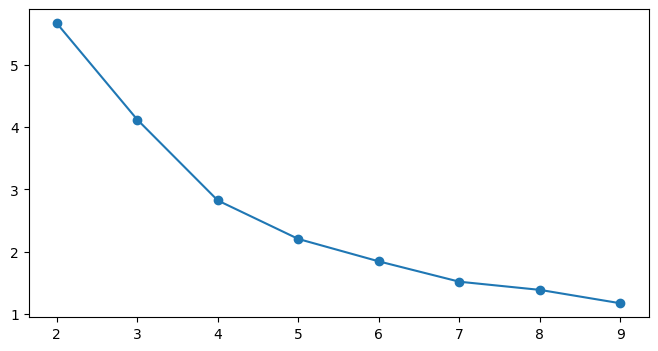

In [55]:
cluster_range = range( 2, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_rfm_df )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(8,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );

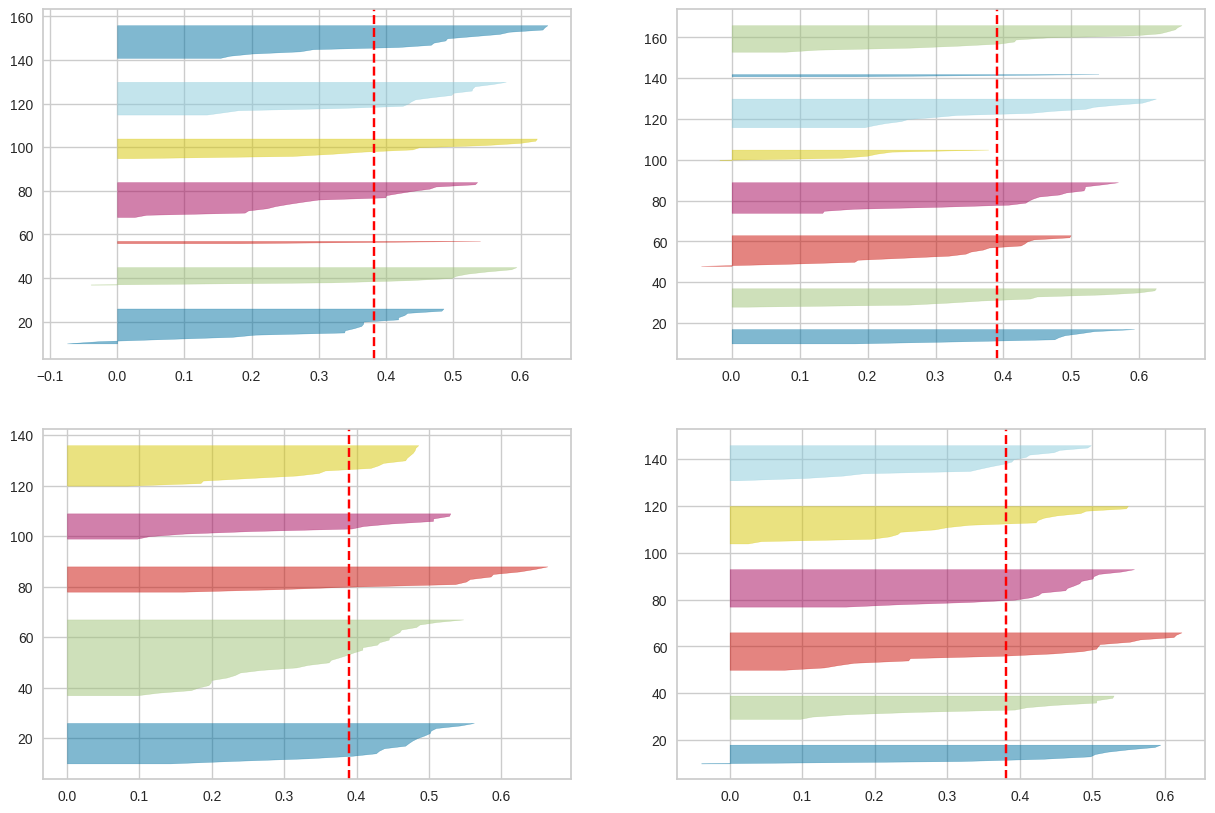

In [56]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,10))
num_clusters = [5, 6, 7, 8]
for i, k in enumerate(num_clusters):
    km = KMeans(n_clusters=k,
                random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km,
                                      colors='yellowbrick',
                                      ax=ax[q-1][mod])
    visualizer.fit(scaled_rfm_df)

In [57]:
k = 5

clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_rfm_df )
rfm_df["clusterid"] = clusters.labels_

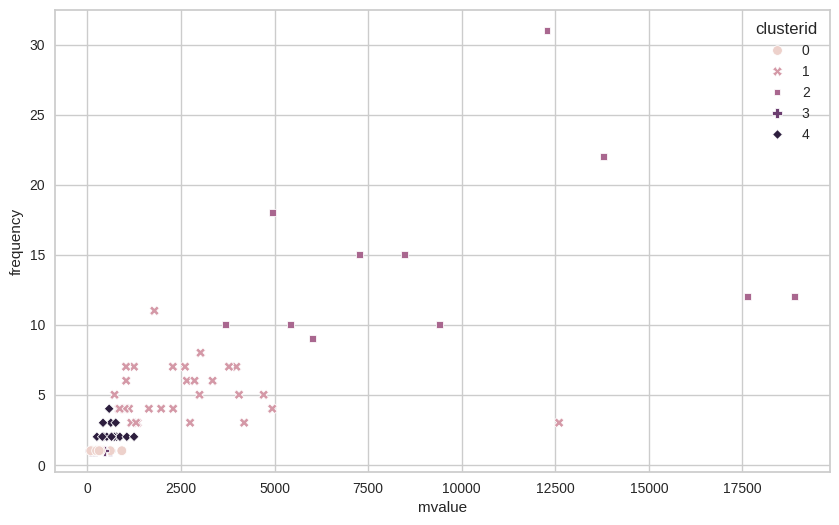

In [58]:
plt.figure(figsize = (10, 6))
sn.scatterplot(data = rfm_df,
               y = 'frequency',
               x = 'mvalue',
               hue = 'clusterid',
               style= "clusterid" );

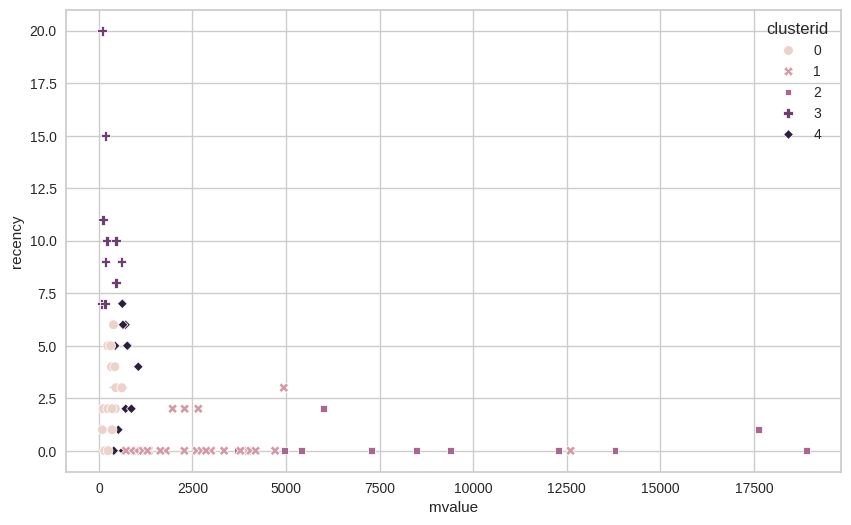

In [59]:
plt.figure(figsize = (10, 6))
sn.scatterplot(data = rfm_df,
               y = 'recency',
               x = 'mvalue',
               hue = 'clusterid',
               style= "clusterid" );

In [70]:
rfm_df.head()

,CustomerID,recency,frequency,mvalue,f_bin,r_bin,log_frequency,log_mvalue,clusterid
0,12583.0,0,15,7281.38,High,High,2.708050,8.893076,2
1,12686.0,20,1,89.14,Low,Low,0.000000,4.490208,3
2,12682.0,0,31,12279.82,High,High,3.433987,9.415713,2
3,12567.0,0,10,9401.28,High,High,2.302585,9.148601,2
4,12681.0,0,22,13787.54,High,High,3.091042,9.531521,2


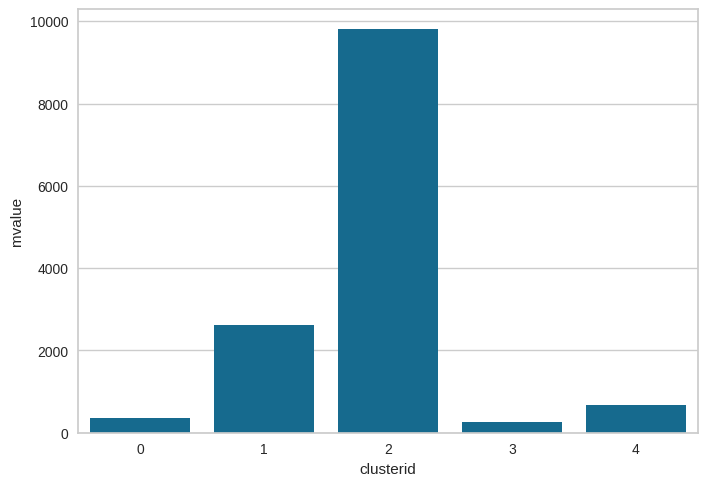

In [92]:
sn.barplot(data = rfm_df,
           x = 'clusterid',
           y = 'mvalue',
           errorbar = None);

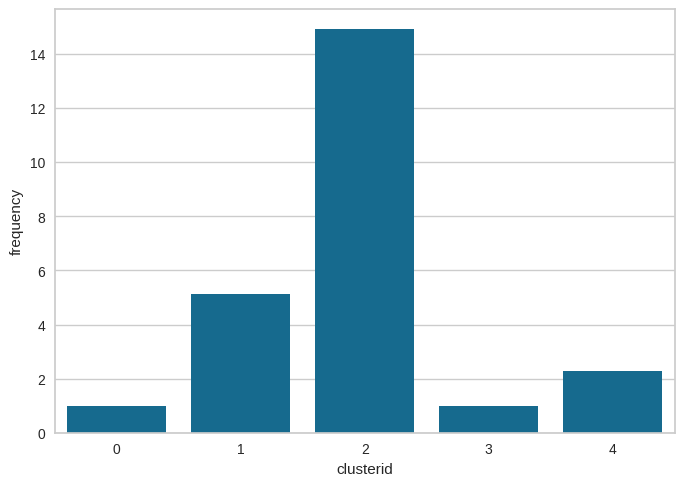

In [93]:
sn.barplot(data = rfm_df,
           x = 'clusterid',
           y = 'frequency',
           errorbar = None);

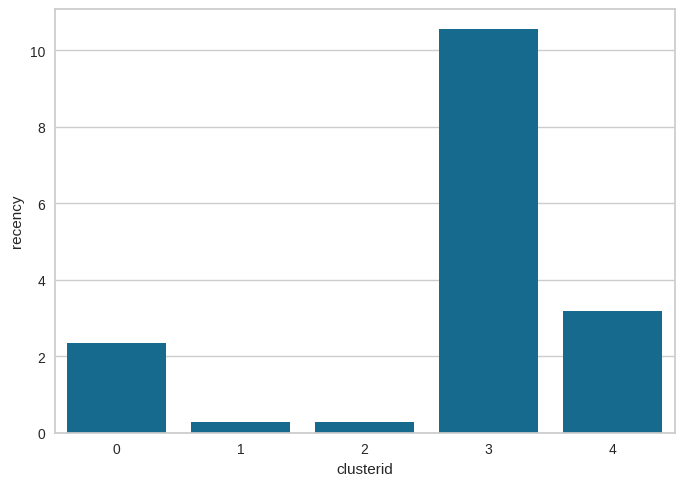

In [94]:
sn.barplot(data = rfm_df,
           x = 'clusterid',
           y = 'recency',
           errorbar = None);

In [86]:
rfm_df[['recency', 'frequency', 'mvalue', 'clusterid']].groupby("clusterid").mean()

,recency,frequency,mvalue
clusterid,,,
0,2.352941,1.000000,347.464706
1,0.290323,5.129032,2618.070000
2,0.272727,14.909091,9801.407273
3,10.545455,1.000000,249.881818
4,3.176471,2.294118,664.885882


In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
rfm_df_scaled = MinMaxScaler().fit_transform(rfm_df[['recency', 'frequency', 'mvalue']])

In [102]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled, columns = ['recency', 'frequency', 'mvalue'])

In [103]:
rfm_df_scaled['CustomerID'] = rfm_df['CustomerID']
rfm_df_scaled['clusterid'] = rfm_df['clusterid']

In [104]:
rfm_df_melted = pd.melt(rfm_df_scaled,
                        id_vars="CustomerID",
                        value_vars=["mvalue", "recency", "frequency"],
                        var_name="CustomerAttribute",
                        value_name='AttributeValue').reset_index()

In [105]:
rfm_df_melted = rfm_df_melted.merge(rfm_df[['CustomerID', 'clusterid']], on = "CustomerID")

In [106]:
rfm_df_melted[rfm_df_melted.CustomerID == 12736.0]

,index,CustomerID,CustomerAttribute,AttributeValue,clusterid
57,19,12736.0,mvalue,0.008527,0
58,106,12736.0,recency,0.000000,0
59,193,12736.0,frequency,0.000000,0


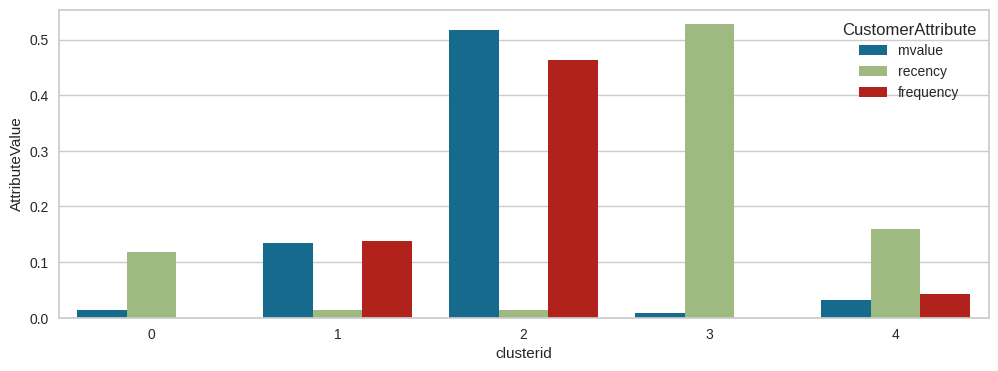

In [109]:
plt.figure(figsize=(12, 4))
sn.barplot(data = rfm_df_melted,
           x = 'clusterid',
           y = 'AttributeValue',
           hue = 'CustomerAttribute',
           errorbar = None);

## Segmentation Interpretation:

- Cluster 0: New Customers

- Cluster 1: Loyal Customers and Promising

- Cluster 2: Star Customers

- Cluster 3: Dormant or Churned

- Cluster 4: On the Fence or Needs attention